# X-Ray Image Classification Project

Phase 4 Project by Bella Scribner
- Flex
- Instructor: Morgan Jones
- Bog: https://datascienceprojectsandmore.blogspot.com/
- Date of Review: Wednesday, March 6th 2024

# Abstract

- Abstract here.

# Introduction

## The Business Problem

- photo of lungs/bronchiole + aviole here

### Pneumonia

Pneumonia is the cause of death for over 725,000 children under the age of 5 worldwide, of which around 190,000 are newborns ([World Health Organization](https://www.who.int/news-room/fact-sheets/detail/pneumonia) and [UNICEF](https://www.unicef.org/stories/childhood-pneumonia-explained)). There are many kinds of pneumonia -- bacterial, fungal, and viral -- but ultimately it is an infection of the lungs where the alveoli (the small sacks at the end of the bronchiole) fill up with pus and fluid making breathing painful and limiting oxygen intake.  As the most common type of pneumonia infection is bacterial, treatment is often as easy as taking a round of antibiotics.  For more severe cases of pneumonia that require hospitalization, oxygen is supplied to the patient if available.

One of the most common ways to diagnosis if a patient has contracted pneumonia is to examine a chest x-ray, looking for white spots in the lungs (called infilrates) ([RadiologyInfo.org](https://www.radiologyinfo.org/en/info/pneumonia#:~:text=When%20interpreting%20the%20x%2Dray,(fluid%20surrounding%20the%20lungs).)).  Examining these chest x-rays can also be useful in identifying if any complications related to pneumonia, such as abscesses or pleural effusions (fluid surrounding the lungs), have arisen.

Treatment of pneumonia is usually a simple and fairly inexpensive round of antibiotics given that the most common type of pneumonia is bacterial.  A vast majority of deaths caused by pneumonia are concentrated in the world's poorest countries (southern Asia and sub-Saharan Africa), where there is a lack of robust health care systems. This includes a shortage of doctors and lack of access to x-rays and labs.  

### UNICEF and Neural Labs Africa

UNICEF is actively working to fight the number of deaths by pneumonia.  One of the ways they are doing this is through their [Venture Fund](https://www.unicef.org/innovation/venturefund/ai-ds-learning-health-cohort) which invests in many different machine learning focused companies that are working to improve health care services.  One such company is [Neural Labs Africa](https://neurallabs.africa/#) (see also [UNICEF Neural Labs Africa](https://www.unicefventurefund.org/story/neural-labs-using-ai-accelerate-medical-imaging-diagnosis-respiratory-diseases)).  Neural Labs Africa is working to leverage AI to "democratize access to diagnostic healthcare" and improve patient care. Their product NeuralSight for Chest Imaging is capable of identifying, labeling and highlighting over 20 respiratory diseases, including pneumonia.  

While what Neural Labs Africa is accomplishing is widely outside the scope of this project, it does serve as the inspiration.  The idea of expanding health care to areas that most need it through machine learning by offering real time diagnoses from a simple x-ray image.  

A crucial note while considering both this project, as well as utilizing AI on a broader scale to improve health care worldwide, is that access to resources is not guaranteed.  Those areas of the world that are most affected by pneumonia do not have access to x-ray technology which puts a limit on how useful products like NeuralSight, or the below proposed project can be.   

It is imperative that access to basic health care services, including It is imperative that access to basic health care services, including mobile x-ray machines, improves.  Only then can predictive models like these really make an impact in suffering communities -- even if access to a doctor or hospital is not available (or easily attainable).  That is when we will see these real time diagnoses be truly impactful in saving lives.

### This Project | The Business + Business Problem

As mentioned above, Neural Labs Africa working with UNICEF is the inspiration for this project.  We will posit a non-for-profit organization, looking to expand access of health care as the business.  The project is to create a model that will predict whether or not a patient has pneumonia based on their x-ray.  The idea is that patients in rural areas, or areas with limited access to hospitals and doctors (but have access to a mobile x-ray machine more locally) can utilize this model as a screening process.  Those patients that have pneumonia can make next steps to get care.   

It is important that we capture as many patients as possible with pneumonia to prevent deaths.  However, placing an undue burden on patients who are not sick must also be avoided whenever possible.  Keeping in mind that we are targeting people who do not have health care resources readily available, the assumption is that taking steps to get care will be quite arduous.  Thus, the goal is to achieve both accurate and precise predictions.  


## The Data Source

The data for this project is sourced from [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia).  The chest x-rays themselves were “selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzou.”  The radiographs were screened for quality control. 

**If reproducing this project from GitHub:**   

The original data source had a different percentage of images in the train and validate folders.  Some prep work has already been done to move a percentage of pictures from the train set into the validation set to create more of an 80/10/10 split between the train/validation/test sets.   

**If reproducing this project via Google CoLab:** 

Please see directions on how to download and prepare the data on the document labeled [google_colab_setup]().  This document goes through the directions and cells to download the Kaggle data and move a percentage of the train images into the validation set to achieve an approximate 80/10/10 split between the train/validation/test sets. 

In [1]:
import os
import shutil

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')

import numpy as np
np.random.seed(88)

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras import regularizers

import tensorflow as tf
tf.random.set_seed(88)

from sklearn.metrics import confusion_matrix

import time
import pandas as pd

In [2]:
# Versions
import sys
import matplotlib
import keras
import sklearn
print('Versions of all libraries:')
print('\tPython | ',sys.version[:5])
print('\tNumpy |', np.__version__)
print('\tMatplotlib | ', matplotlib.__version__)
print('\tSeaborn | ', sns.__version__)
print('\tKeras | ', keras.__version__)
print('\tTensorflow | ', tf.__version__)
print('\tScikit-Learn | ', sklearn.__version__)

Versions of all libraries:
	Python |  3.8.5
	Numpy | 1.18.5
	Matplotlib |  3.3.1
	Seaborn |  0.11.0
	Keras |  2.4.3
	Tensorflow |  2.3.1
	Scikit-Learn |  1.3.2


# Data Exploration

## The overview
- From notes of last review --> keep this more contextual and word driven on the front end.  Can talk about results on the back end but want it mostly connected to the header!  
- Don't forget to include target distribution as well as visuals of data in general.

- Talk about all the things, referencing below here!

## Detailed exploration

- image sample
- distribution of target

In [59]:
# View Structure of Data

print('chest_xray folder:', os.listdir('./chest_xray'))

# View structure of train folder
print('chest_xray/train folder:', os.listdir('./chest_xray/train'))

chest_xray folder: ['chest_xray', 'test', 'train', 'val', '__MACOSX']
chest_xray/train folder: ['NORMAL', 'PNEUMONIA']


In [14]:
len_normal_train = len(os.listdir('./chest_xray/train/NORMAL'))
len_pneu_train = len(os.listdir('./chest_xray/train/PNEUMONIA'))
len_total_train = len_normal_train + len_pneu_train

len_normal_val = len(os.listdir('./chest_xray/val/NORMAL'))
len_pneu_val = len(os.listdir('./chest_xray/val/PNEUMONIA'))
len_total_val = len_normal_val + len_pneu_val

len_normal_test = len(os.listdir('./chest_xray/test/NORMAL'))
len_pneu_test = len(os.listdir('./chest_xray/test/PNEUMONIA'))
len_total_test = len_normal_test + len_pneu_test

print("There are", len_total_train, "images total in the training set.")
print("There are", len_total_val, "images total in the validation set.")
print("There are", len_total_test, "images total in the test set.\n")

num_images_total = len_total_train + len_total_val + len_total_test
print('Using {}% of data to train'.format(round(len_total_train / num_images_total *100,2)))
print('Using {}% of data to validate'.format(round(len_total_val / num_images_total *100,2)))
print('Using {}% of data to test'.format(round(len_total_test / num_images_total *100,2)))

There are 4696 images total in the training set.
There are 536 images total in the validation set.
There are 624 images total in the test set.

Using 80.19% of data to train
Using 9.15% of data to validate
Using 10.66% of data to test


In [15]:
print('Target Distributon:')
print('{}% normal'.format(round(len_normal_train/len_total_train * 100, 2)))
print('{}% pneumonia'.format(round(len_pneu_train/len_total_train * 100, 2)))

Target Distributon:
23.02% normal
76.98% pneumonia


That isn't quite 80/10/10 split, but much better than before and will be a good split for this project.  We have a rather unbalanced target distribution.  This might need to be addressed when processing the data in preparation of modeling.

In [17]:
# take a look at some images

train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'
test_dir = 'chest_xray/test'

# all images will be rescaled by 1./225
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    # resize images down to 150x150
                                                    target_size=(150,150),
                                                    # process in 587 batches
                                                    batch_size=8,
                                                    # target is binary
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(150,150),
                                                batch_size=8,
                                                class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  batch_size=8,
                                                  class_mode='binary')

Found 4696 images belonging to 2 classes.
Found 536 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [18]:
# Create a data sets
## Warning!  This cell might take some time to run
train_images = []
train_labels = []

val_images = []
val_labels = []

test_images = []
test_labels = []

start_time = time.time()

for batch in range(587):
    train_i, train_l = next(train_generator)
    train_images.append(train_i)
    train_labels.append(train_l)
    
for batch in range(67):
    val_i, val_l = next(val_generator)
    val_images.append(val_i)
    val_labels.append(val_l)
    
for batch in range(78):
    test_i, test_l = next(test_generator)
    test_images.append(test_i)
    test_labels.append(test_l)
    
end_time = time.time()
execution_time = end_time - start_time
print('Execution Time: {}'.format(round(execution_time),2))

Execution Time: 191


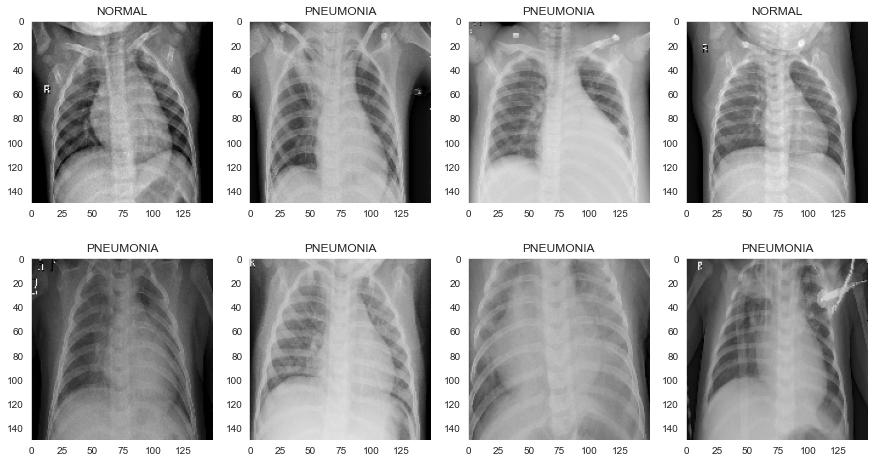

In [19]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(15,8))
classes = list(train_generator.class_indices.keys())

for i in range(8):
    row = i // 4 
    col = i % 4
    ax = axes[row, col]

    ax.imshow(train_images[0][i])
    label = int(train_labels[0][i])
    ax.set_title(classes[label])
    ax.axis('off')

In [ ]:
# Normal xray
train_images[0][i]

colors= ('red', 'green', 'blue')

fig, ax = plt.subplots()

for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram()

In [20]:
# Plot image + histogram of pixe intensities
#plt.imshow(<picture>)
#plt.axis('off')

#plt.hist(<picture>[:,:,0].flatten(), bins=number, lw=0, color= 'r', alpha=0.5)
#plt.hist(<picture>[:,:,1].flatten(), bins=number, lw=0, color= 'r', alpha=0.5)
#plt.hist(<picture>[:,:,2].flatten(), bins=number, lw=0, color= 'r', alpha=0.5)

#OR

#colors = ('red', 'green', 'blue')
#for channel_id, color in enumerate(colors):
#    histogram, bin_edges = np.histogram(<picture>[:,:,channel_id]), bins=numb, range=(0,1)
#    plt.plot(bin_edges[0], histogram, color=color)

# Model Iteration

## Baseline Model

- Baseline model is Dense Neural Network -- then will iterate through a CNN, then optimize that CNN (assuming does better)

- Build Model (Dense model as base line -- convolutonal in further iterations
- Evaluate with loss + accuracy curves

In [21]:
# Baseline model is Dense NN, thus need to reshape data prior to inputting
print('Train images shape:', train_images[0].shape)
print('Train labels shape:', train_labels[0].shape)
print('Validation images shape:', val_images[0].shape)
print('Validation labels shape:', val_labels[0].shape)
print('Test images shape:', test_images[0].shape)
print('Test labels shape:', test_labels[0].shape)

Train images shape: (8, 150, 150, 3)
Train labels shape: (8,)
Validation images shape: (8, 150, 150, 3)
Validation labels shape: (8,)
Test images shape: (8, 150, 150, 3)
Test labels shape: (8,)


In [22]:
# Reshape images
train_img_reshaped = train_images[0].reshape(train_images[0].shape[0],-1)
val_img_reshaped = val_images[0].reshape(val_images[0].shape[0],-1)

print(train_img_reshaped.shape)
print(val_img_reshaped.shape)

(8, 67500)
(8, 67500)


In [23]:
# Reshape Labels
rain_labels_reshaped = train_labels[0].reshape(train_labels[0].shape[0],1)
val_labels_reshaped = val_labels[0].reshape(val_labels[0].shape[0],1)

print(train_labels_reshaped.shape)
print(val_labels_reshaped.shape)

(8, 1)
(8, 1)


In [24]:
# Reshape more batches and append to already reshaped arrays -- 25% data
for i in range(1,147):
    train_img_reshaped = np.concatenate((train_img_reshaped, train_images[i].reshape(train_images[i].shape[0], -1)))
    train_labels_reshaped = np.concatenate((train_labels_reshaped, train_labels[i].reshape(train_labels[i].shape[0], -1)))
    
for i in range(1,17):
    val_img_reshaped = np.concatenate((val_img_reshaped, val_images[i].reshape(val_images[i].shape[0], -1)))
    val_labels_reshaped = np.concatenate((val_labels_reshaped, val_labels[i].reshape(val_labels[i].shape[0], -1)))

In [25]:
# Build Baseline Model
baselinemodel = Sequential()

baselinemodel.add(layers.Dense(15, activation='relu', input_shape=(67500,)))
baselinemodel.add(layers.Dense(8, activation='relu'))
baselinemodel.add(layers.Dense(5, activation='relu'))

baselinemodel.add(layers.Dense(1, activation='sigmoid'))

baselinemodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                1012515   
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 1,012,694
Trainable params: 1,012,694
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile model
baselinemodel.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), 
                      loss='binary_crossentropy', 
                      metrics=['accuracy', 
                               tf.keras.metrics.Recall(), 
                               tf.keras.metrics.Precision()])

In [27]:
# Add an Early Stopping
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                             patience=8)

In [28]:
# Fit Model
start_time = time.time()
baseline_history = baselinemodel.fit(train_img_reshaped,
                                     train_labels_reshaped,
                                     epochs=40,
                                     validation_data=(val_img_reshaped, val_labels_reshaped),
                                     callbacks = [callback])

end_time = time.time()
execution_time = end_time - start_time
print('Execution Time: {}'.format(round(execution_time),2))

Epoch 1/40
37/37 [==============================] - 2s 56ms/step - loss: 0.6774 - accuracy: 0.7840 - recall: 0.9968 - precision: 0.7858 - val_loss: 0.7780 - val_accuracy: 0.4485 - val_recall: 1.0000 - val_precision: 0.4485
Epoch 2/40
37/37 [==============================] - 1s 25ms/step - loss: 0.4645 - accuracy: 0.7857 - recall: 1.0000 - precision: 0.7857 - val_loss: 0.9098 - val_accuracy: 0.4485 - val_recall: 1.0000 - val_precision: 0.4485
Epoch 3/40
37/37 [==============================] - 1s 25ms/step - loss: 0.3996 - accuracy: 0.7857 - recall: 1.0000 - precision: 0.7857 - val_loss: 0.6463 - val_accuracy: 0.4485 - val_recall: 1.0000 - val_precision: 0.4485
Epoch 4/40
37/37 [==============================] - 1s 25ms/step - loss: 0.3765 - accuracy: 0.7857 - recall: 1.0000 - precision: 0.7857 - val_loss: 0.7536 - val_accuracy: 0.4632 - val_recall: 1.0000 - val_precision: 0.4552
Epoch 5/40
37/37 [==============================] - 1s 25ms/step - loss: 0.3493 - accuracy: 0.8333 - recall:

In [29]:
def create_metric_lists(model_history, model, x_val_data, y_val_data):
    """
    This function takes in a fitted NN model that included the below metric list when compiled and outputs a list
    of the training metrics and a list of the validation metrics.
    """
    # get loss, accuracy, recall, and precision
    train_metrics = [model_history.history[i] for i in list(model_history.history.keys())[:4]]
    val_metrics = [model_history.history[i] for i in list(model_history.history.keys())[4:]]
    
    # calculate F1 score
    recall = np.array(train_metrics[2])
    precision = np.array(train_metrics[3])
    f1 = 2 * ((precision * recall) / (precision + recall))
    train_metrics.append(list(f1))
    
    recall = np.array(val_metrics[2])
    precision = np.array(val_metrics[3])
    f1 = 2 * ((precision * recall) / (precision + recall))
    val_metrics.append(list(f1))
    
    # Confusion Matrix
    cnfs_mtrx = confusion_matrix(y_val_data, np.where(model.predict(x_val_data) >= 0.5, 1,0))
    
    return train_metrics, val_metrics, cnfs_mtrx

In [30]:
# Keep track of models + metrics for easy side-by-side comparison
all_model_metrics = {'Model': [],
                    'Loss': [],
                    'Accuracy': [],
                    'Recall': [],
                    'Precision': [],
                    'F1 Score': [],
                    'Computation Time per Epoch': [],
                    'Confusion Matrix': []}

def record_all(all_model_metrics, val_metrics, model_name, time, cnfs_mtrx, num_epochs):
    
    metrics = ['Loss', 'Accuracy', 'Recall', 'Precision', 'F1 Score']
    
    all_model_metrics['Model'].append(model_name)
    
    for i,metric in enumerate(metrics):
        all_model_metrics[metric].append(val_metrics[i][-1])
    
    time_per_epoch = round(time/num_epochs)
    
    all_model_metrics['Computation Time per Epoch'].append(time_per_epoch)
    all_model_metrics['Confusion Matrix'].append(cnfs_mtrx)
    
    return all_model_metrics

In [31]:
def visualize_metrics(x, train_metrics, val_metrics, model_name, cnfs_mtrx):
    """
    -This function takes in an x (representing the number of epochs), a list of the training metrics, 
    and a list of the validation metrics.  These lists should contain a list for each metric used, specifically,
    in order, the model's loss, accuracy, recall, and precision per epoch.  
    -It also takes in a string of the model name used to title the visual.
    -The function outputs four graphs, one for each metric, with the training and validation data on the same axes.
    """
    
    metrics = ['Loss', 'Accuracy', 'Recall', 'Precision', 'F1 Score']

    fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,13))
    for i in range(5):
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        ax.plot(x,train_metrics[i], label='Train', color='b')
        ax.plot(x, val_metrics[i], label='Validation', color='r')
        ax.set_title(metrics[i], fontsize='x-large')
        ax.set_xlabel('Epochs')
        ax.set_ylabel(metrics[i])
        ax.grid(True)
        ax.legend()
    
    sns.heatmap(cnfs_mtrx, annot=True, ax=axes[1,2])
    axes[1,2].set_title('Confusion Matrix', fontsize='x-large')
    axes[1,2].set_xticklabels(['Normal', 'Pneumonia'])
    axes[1,2].set_yticklabels(['Normal', 'Pneumonia'])
    axes[1,2].set_xlabel('Predicted Label')
    axes[1,2].set_ylabel('True Label')
        
    plt.suptitle('{} Metrics'.format(model_name), fontsize='xx-large')
    plt.tight_layout()

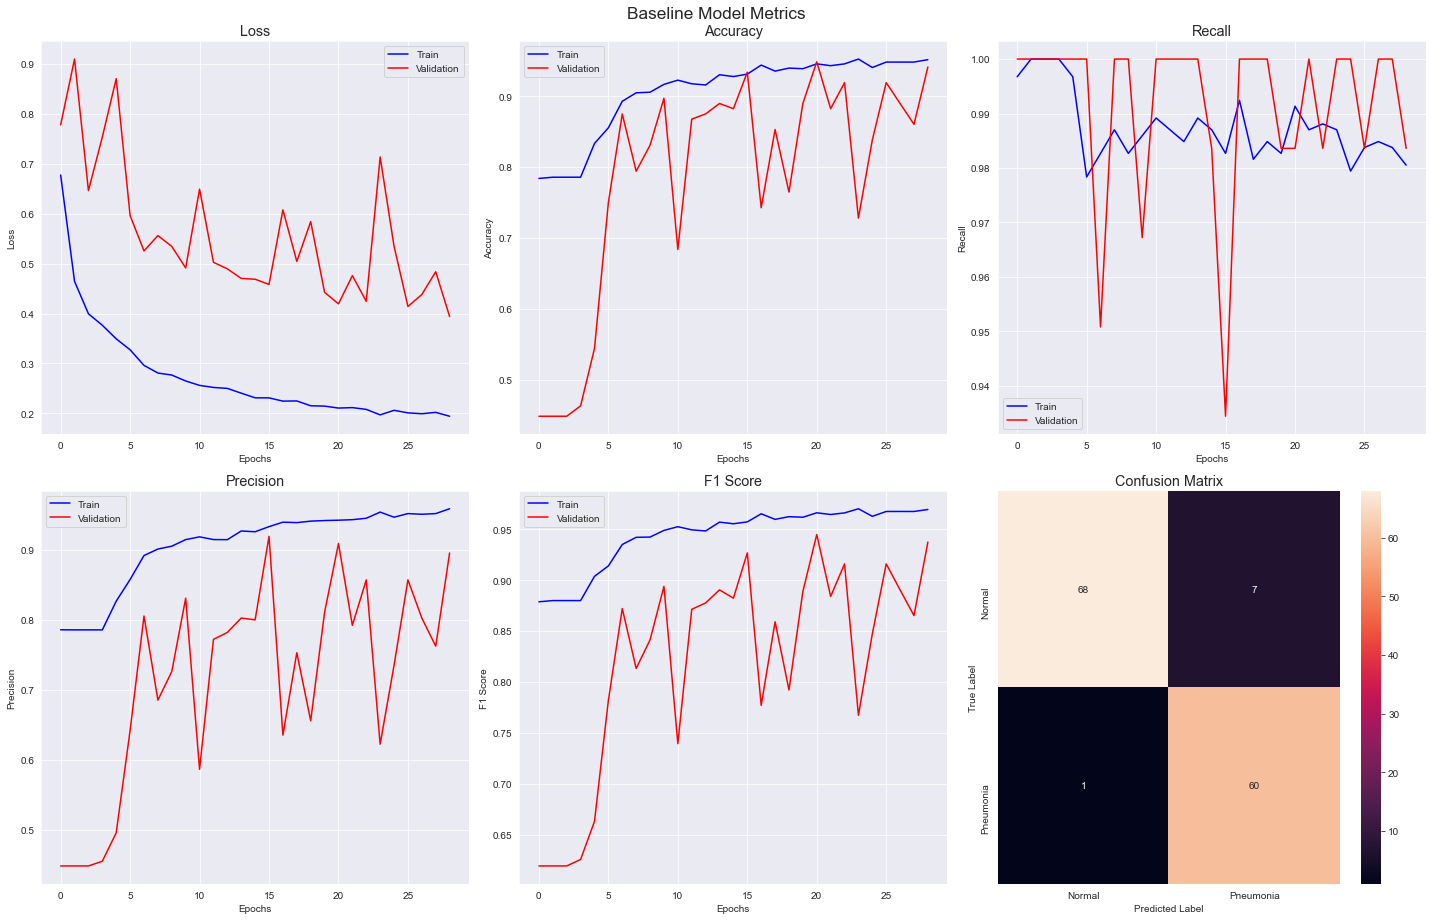

In [32]:
train_metrics, val_metrics, cnfs_mtrx = create_metric_lists(baseline_history, 
                                                                   baselinemodel, 
                                                                   val_img_reshaped, 
                                                                   val_labels_reshaped)
all_model_metrics = record_all(all_model_metrics, 
                               val_metrics, 
                               'Baseline Model', 
                               execution_time, 
                               cnfs_mtrx,
                               callback.stopped_epoch)

visualize_metrics(range(callback.stopped_epoch+1), train_metrics, val_metrics, 'Baseline Model', cnfs_mtrx)

We can see that our validation results are not great.  Recall is not the best metric to evaluate this model with because of the class imbalance, although due to the nature of our project, we do not want to completely ignore it.  With Recall jumping up to 100% but precision and accuracy of the validation data much lower than the training data, we can safely assume and see that our model is overfitting.

Let's see if we can improve this by (1) using more of the data itself (currently we are only using an eighth of our available training data), (2) using a convolution neural network to help decrease overfitting, and (3) try applying a/some regularization techniques such as dropout to decrease overfitting.

## Same Model Structure as above, but with more data.

First, let's see if we can increase the performance of this baseline model by simply using more data.  This will mean increased time -- we will have to weigh if the time cost is worth the increase we see.  We will try using 75%.

In [33]:
# Reshape more batches and append to already reshaped arrays --- 75% data
for i in range(147,441):
    train_img_reshaped = np.concatenate((train_img_reshaped, train_images[i].reshape(train_images[i].shape[0], -1)))
    train_labels_reshaped = np.concatenate((train_labels_reshaped, train_labels[i].reshape(train_labels[i].shape[0], -1)))
    
for i in range(17,51):
    val_img_reshaped = np.concatenate((val_img_reshaped, val_images[i].reshape(val_images[i].shape[0], -1)))
    val_labels_reshaped = np.concatenate((val_labels_reshaped, val_labels[i].reshape(val_labels[i].shape[0], -1)))

In [34]:
print(train_img_reshaped.shape)
print(val_img_reshaped.shape)
print(train_labels_reshaped.shape)
print(val_labels_reshaped.shape)

(3528, 67500)
(408, 67500)
(3528, 1)
(408, 1)


In [35]:
# Rebuild Model
baselinemodel_75 = Sequential()

baselinemodel_75.add(layers.Dense(15, activation='relu', input_shape=(67500,)))
baselinemodel_75.add(layers.Dense(8, activation='relu'))
baselinemodel_75.add(layers.Dense(5, activation='relu'))

baselinemodel_75.add(layers.Dense(1, activation='sigmoid'))

In [36]:
# Compile model
start_time = time.time()
baselinemodel_75.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), 
                      loss='binary_crossentropy', 
                      metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

# Add an Early Stopping
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                             patience=8)
# Fit Model
baseline_75_history = baselinemodel_75.fit(train_img_reshaped,
                                     train_labels_reshaped,
                                     epochs=40,
                                     batch_size=35,
                                     validation_data=(val_img_reshaped, val_labels_reshaped),
                                     callbacks=[callback])
end_time = time.time()
execution_time = end_time - start_time
print('Execution Time: {}'.format(round(execution_time),2))

Epoch 1/40
101/101 [==============================] - 4s 35ms/step - loss: 0.6918 - accuracy: 0.7664 - recall_1: 0.9890 - precision_1: 0.7727 - val_loss: 0.6932 - val_accuracy: 0.4951 - val_recall_1: 1.0000 - val_precision_1: 0.4951
Epoch 2/40
101/101 [==============================] - 3s 25ms/step - loss: 0.6889 - accuracy: 0.7735 - recall_1: 1.0000 - precision_1: 0.7735 - val_loss: 0.6933 - val_accuracy: 0.4951 - val_recall_1: 1.0000 - val_precision_1: 0.4951
Epoch 3/40
101/101 [==============================] - 3s 25ms/step - loss: 0.6863 - accuracy: 0.7735 - recall_1: 1.0000 - precision_1: 0.7735 - val_loss: 0.6934 - val_accuracy: 0.4951 - val_recall_1: 1.0000 - val_precision_1: 0.4951
Epoch 4/40
101/101 [==============================] - 3s 25ms/step - loss: 0.6838 - accuracy: 0.7735 - recall_1: 1.0000 - precision_1: 0.7735 - val_loss: 0.6935 - val_accuracy: 0.4951 - val_recall_1: 1.0000 - val_precision_1: 0.4951
Epoch 5/40
101/101 [==============================] - 3s 26ms/step -

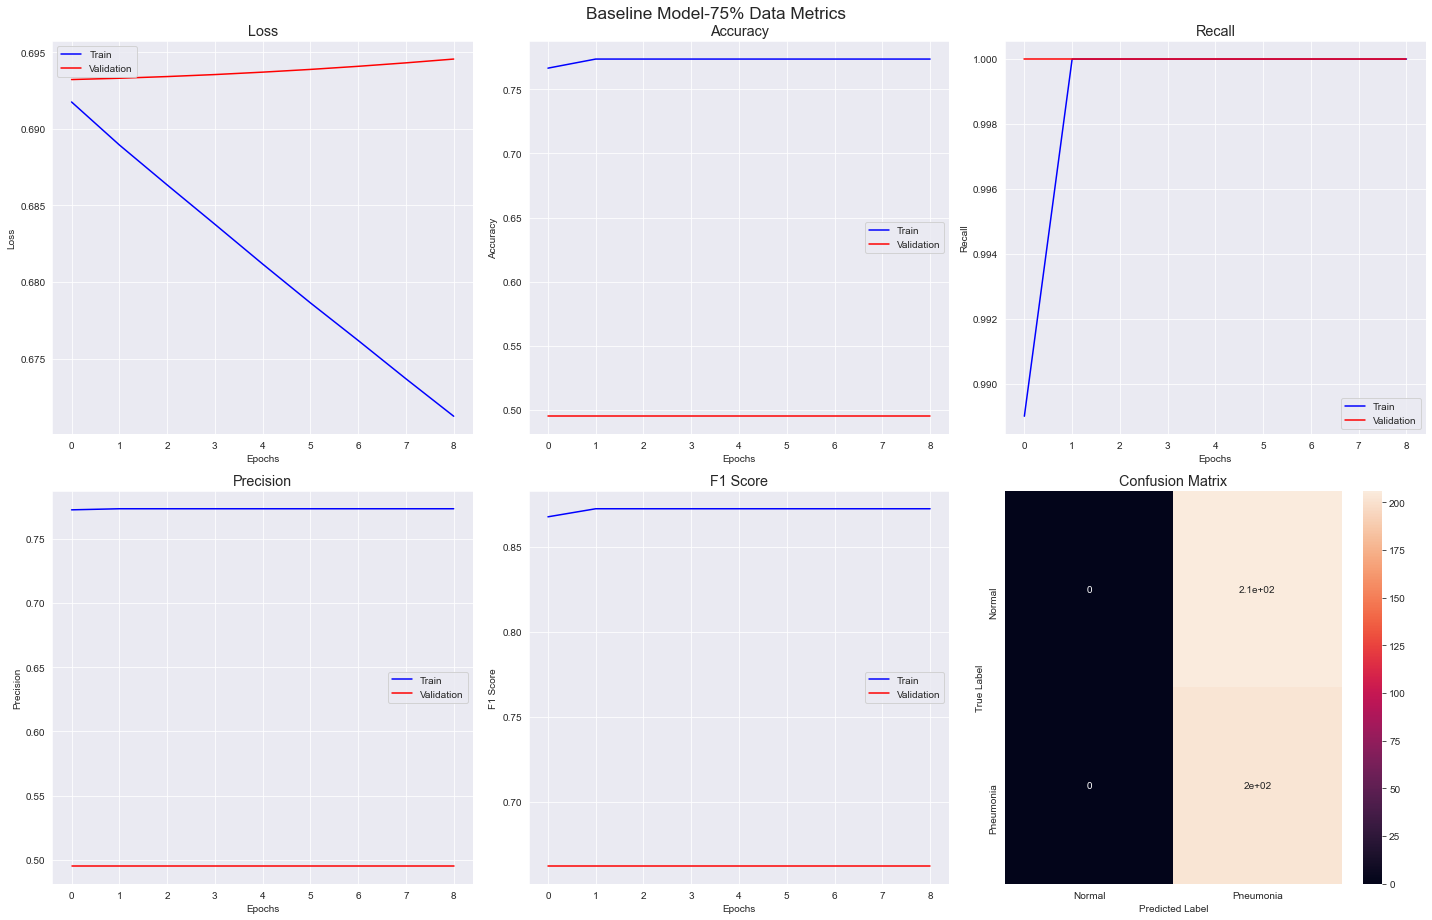

In [37]:
# Visualize Results
train_metrics, val_metrics, cnfs_mtrx = create_metric_lists(baseline_75_history,
                                                           baselinemodel_75,
                                                           val_img_reshaped,
                                                           val_labels_reshaped)

all_model_metrics = record_all(all_model_metrics, 
                              val_metrics,
                              'Baseline 75',
                              execution_time,
                              cnfs_mtrx,
                              callback.stopped_epoch)

visualize_metrics(range(callback.stopped_epoch+1), train_metrics, val_metrics, 'Baseline Model-75% Data', cnfs_mtrx)

At a glance, we can see that adding more data actually made our model worse!  Let's move on to convolutional neural network to see if that improves our performance.  Based on the fact that we are clearly overfitting, this seems like the best approach.

## Model 2

- CNN --> CNNs take in the image itself (not reshaped) as the input


In [38]:
# Build the model

cnn = Sequential()

cnn.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)))
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Conv2D(32, (3,3), activation='relu'))
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Conv2D(20, (3,3), activation='relu'))
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Flatten())

cnn.add(layers.Dense(80, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid'))

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 20)        5780      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5780)             

In [39]:
# Comiple Model
cnn.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [40]:
start_time = time.time()

# Add an Early Stopping
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                             patience=8)

# Train Model
cnn_history = cnn.fit(train_generator,
                     epochs=40,
                     validation_data = val_generator,
                     callbacks=[callback])

end_time = time.time()
execution_time = end_time - start_time
print('Execution Time: {}'.format(round(execution_time),2))

Epoch 1/40
587/587 [==============================] - 254s 433ms/step - loss: 0.2360 - accuracy: 0.9063 - recall_2: 0.9596 - precision_2: 0.9219 - val_loss: 0.1420 - val_accuracy: 0.9478 - val_recall_2: 0.9291 - val_precision_2: 0.9651
Epoch 2/40
587/587 [==============================] - 1049s 2s/step - loss: 0.1165 - accuracy: 0.9576 - recall_2: 0.9737 - precision_2: 0.9713 - val_loss: 0.3212 - val_accuracy: 0.9049 - val_recall_2: 0.9888 - val_precision_2: 0.8466
Epoch 3/40
587/587 [==============================] - 95s 162ms/step - loss: 0.0807 - accuracy: 0.9687 - recall_2: 0.9793 - precision_2: 0.9801 - val_loss: 0.1376 - val_accuracy: 0.9534 - val_recall_2: 0.9851 - val_precision_2: 0.9263
Epoch 4/40
587/587 [==============================] - 90s 153ms/step - loss: 0.0706 - accuracy: 0.9738 - recall_2: 0.9820 - precision_2: 0.9839 - val_loss: 0.1306 - val_accuracy: 0.9571 - val_recall_2: 0.9888 - val_precision_2: 0.9298
Epoch 5/40
587/587 [==============================] - 91s 15

In [41]:
# Get rest of labeled validation data    
for i in range(51,67):
    val_labels_reshaped = np.concatenate((val_labels_reshaped, val_labels[i].reshape(val_labels[i].shape[0], -1)))

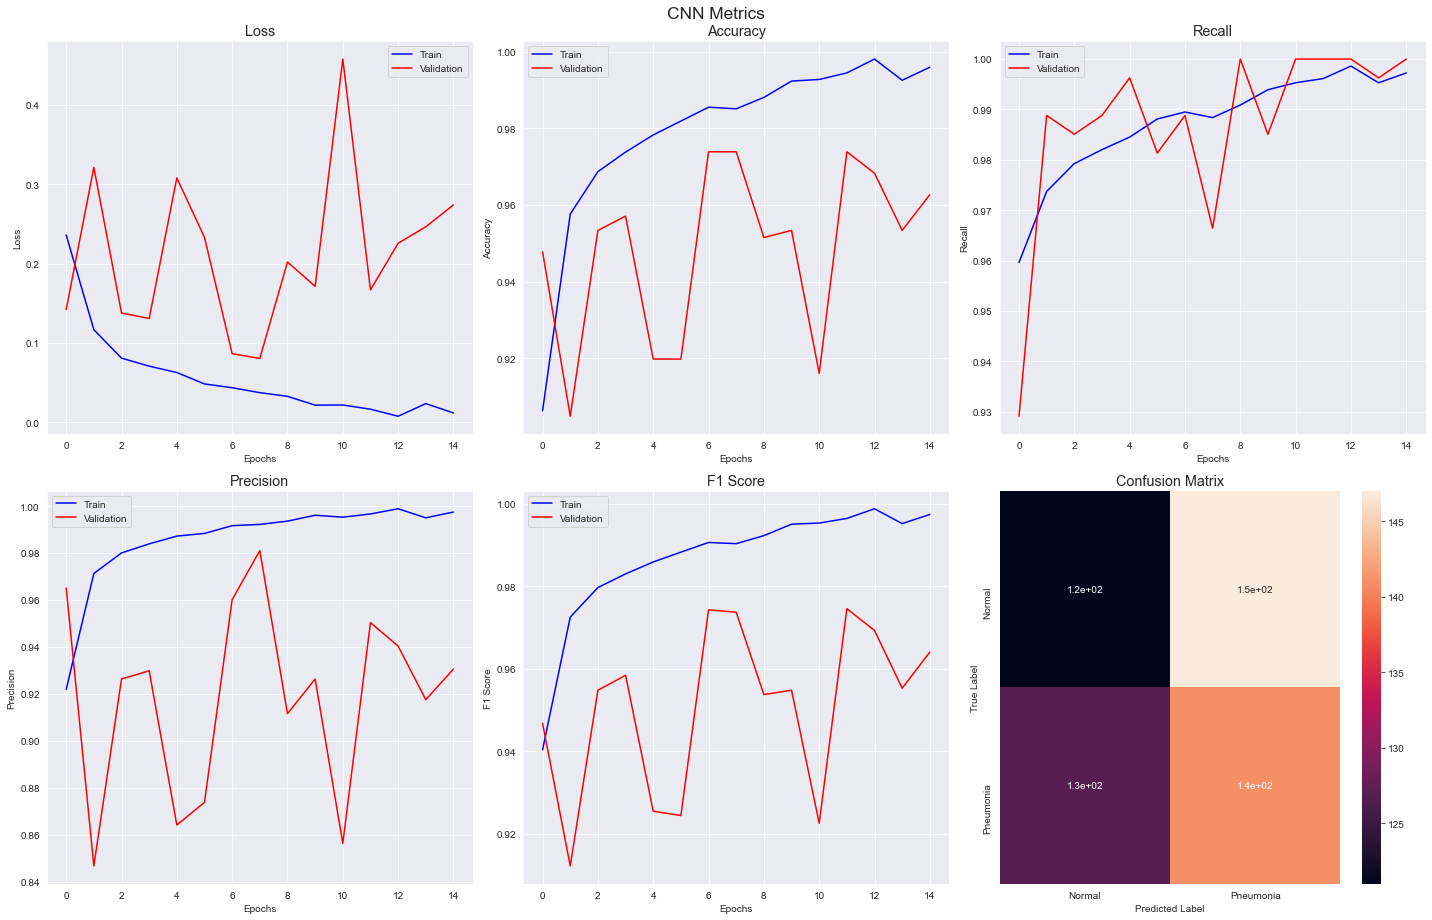

In [42]:
train_metrics, val_metrics, cnfs_mtrx = create_metric_lists(cnn_history,
                                                            cnn,
                                                            val_generator,
                                                            val_labels_reshaped)
all_model_metrics = record_all(all_model_metrics, 
                               val_metrics, 
                               'CNN', 
                               execution_time, 
                               cnfs_mtrx,
                               callback.stopped_epoch)

visualize_metrics(range(callback.stopped_epoch+1), train_metrics, val_metrics, 'CNN', cnfs_mtrx)

In [43]:
# Small Analysis of the model here

## Model 3

- optimize CNN (assuming better than Dense NN)



In [44]:
# Add in drop out layers + regularilization

cnn_reg = Sequential()

cnn_reg.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)))

cnn_reg.add(layers.MaxPooling2D((2,2)))
cnn_reg.add(layers.Dropout(0.3))

cnn_reg.add(layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.005)))
cnn_reg.add(layers.MaxPooling2D((2,2)))
cnn_reg.add(layers.Dropout(0.3))

cnn_reg.add(layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.005)))
cnn_reg.add(layers.MaxPooling2D((2,2)))
cnn_reg.add(layers.Dropout(0.3))


cnn_reg.add(layers.Conv2D(20, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.005)))
cnn_reg.add(layers.MaxPooling2D((2,2)))

cnn_reg.add(layers.Flatten())

cnn_reg.add(layers.Dense(80, activation='relu'))
cnn_reg.add(layers.Dense(1, activation='sigmoid'))

cnn_reg.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)       

In [45]:
# Comiple Model
cnn_reg.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [46]:
start_time = time.time()

# Add an Early Stopping
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                             patience=8)

# Train Model
cnn_reg_history = cnn_reg.fit(train_generator,
                     epochs=40,
                     validation_data = val_generator,
                     callbacks=[callback])

end_time = time.time()
execution_time = end_time - start_time
print('Execution Time: {}'.format(round(execution_time),2))

Epoch 1/40
587/587 [==============================] - 91s 155ms/step - loss: 0.4795 - accuracy: 0.8654 - recall_3: 0.9494 - precision_3: 0.8843 - val_loss: 0.4870 - val_accuracy: 0.9067 - val_recall_3: 0.9739 - val_precision_3: 0.8586
Epoch 2/40
587/587 [==============================] - 90s 154ms/step - loss: 0.2492 - accuracy: 0.9304 - recall_3: 0.9582 - precision_3: 0.9516 - val_loss: 0.3022 - val_accuracy: 0.9216 - val_recall_3: 0.9925 - val_precision_3: 0.8693
Epoch 3/40
587/587 [==============================] - 91s 156ms/step - loss: 0.2134 - accuracy: 0.9408 - recall_3: 0.9627 - precision_3: 0.9605 - val_loss: 0.2232 - val_accuracy: 0.9534 - val_recall_3: 0.9776 - val_precision_3: 0.9324
Epoch 4/40
587/587 [==============================] - 97s 165ms/step - loss: 0.1942 - accuracy: 0.9470 - recall_3: 0.9701 - precision_3: 0.9613 - val_loss: 0.1738 - val_accuracy: 0.9534 - val_recall_3: 0.9179 - val_precision_3: 0.9880
Epoch 5/40
587/587 [==============================] - 94s 16

Execution Time: 3895


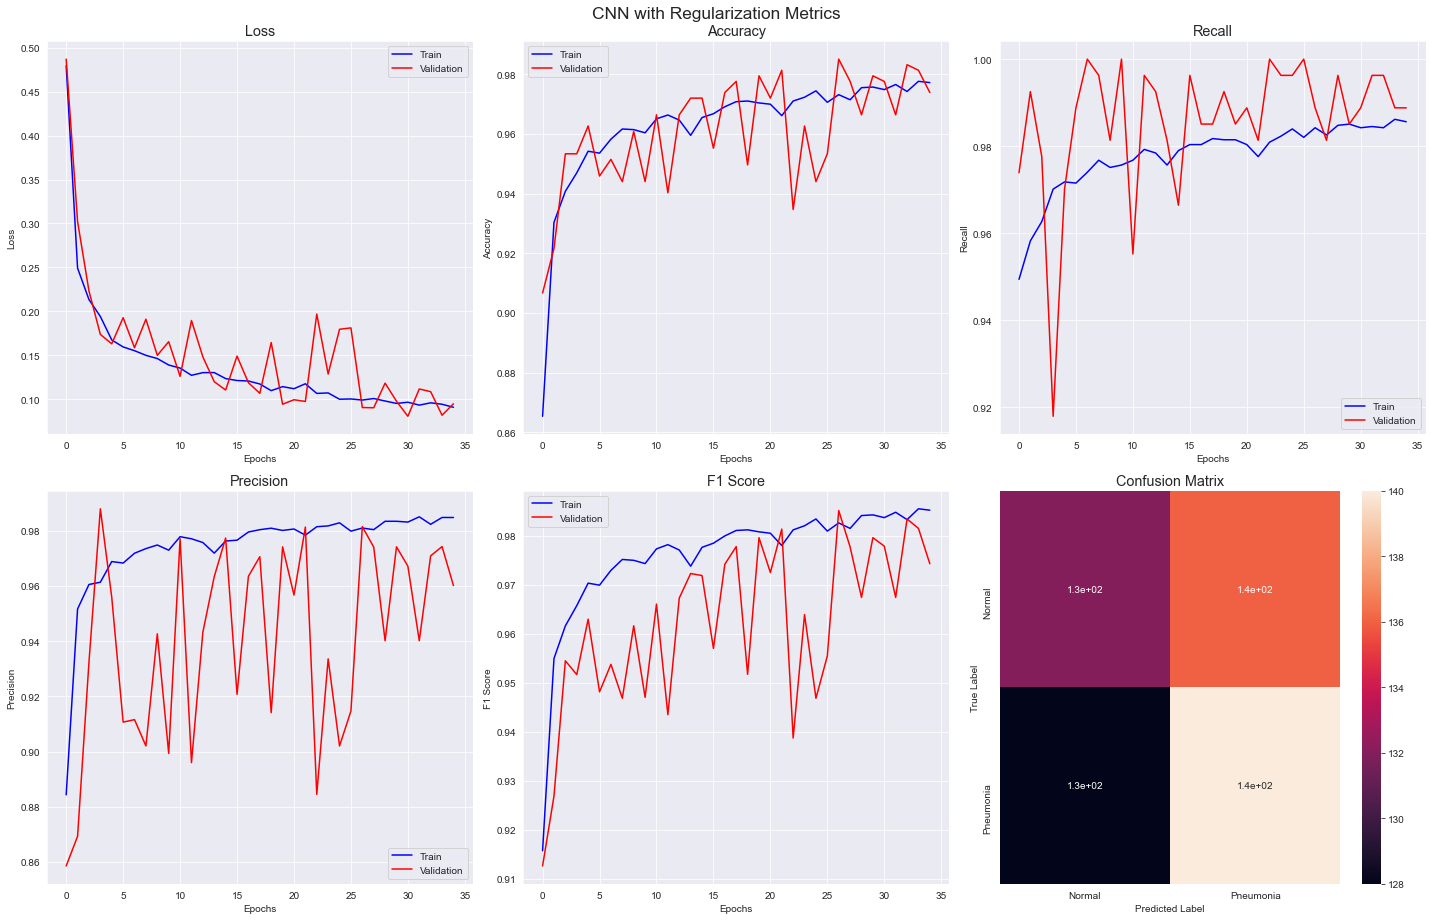

In [47]:
train_metrics, val_metrics, cnfs_mtrx = create_metric_lists(cnn_reg_history,
                                                            cnn_reg,
                                                            val_generator,
                                                            val_labels_reshaped)
all_model_metrics = record_all(all_model_metrics, 
                               val_metrics, 
                               'CNN with Reg', 
                               execution_time, 
                               cnfs_mtrx,
                               callback.stopped_epoch)

visualize_metrics(range(callback.stopped_epoch+1), train_metrics, val_metrics, 'CNN with Regularization', cnfs_mtrx)

### Model 4

- Explore transfer learning!!
- (look at visualizations to see how model performing

In [48]:
#from tf.keras.applications import EfficientNetB3
cnn_base = tf.keras.applications.VGG19(weights='imagenet', 
                         include_top=False,
                         input_shape=(150,150,3),
                         pooling='max')

cnn_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [49]:
transfer_model = Sequential()

transfer_model.add(cnn_base)
transfer_model.add(layers.Flatten())
transfer_model.add(layers.Dense(132, activation='relu'))
transfer_model.add(layers.Dense(1, activation='sigmoid'))

transfer_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 132)               67716     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 133       
Total params: 20,092,233
Trainable params: 20,092,233
Non-trainable params: 0
_________________________________________________________________


In [50]:
for layer in transfer_model.layers:
    print(layer.name, layer.trainable)
    
print('Number of trainable weights: ', len(transfer_model.trainable_weights))

vgg19 True
flatten_2 True
dense_12 True
dense_13 True
Number of trainable weights:  36


In [51]:
# Freeze the 'cnn base'
cnn_base.trainable = False

# Sanity Check
for layer in transfer_model.layers:
    print(layer.name, layer.trainable)
    
print('Number of trainable weights: ', len(transfer_model.trainable_weights))

vgg19 False
flatten_2 True
dense_12 True
dense_13 True
Number of trainable weights:  4


In [61]:
start_time = time.time()

# Comiple Model
transfer_model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

# Add an Early Stopping
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                             patience=8)

# Train Model
transfer_model_history = transfer_model.fit(train_generator,
                     epochs=40,
                     validation_data = val_generator,
                     callbacks=[callback])

end_time = time.time()
execution_time = end_time - start_time
print('Execution Time: {}'.format(round(execution_time),2))

Epoch 1/40
587/587 [==============================] - 292s 498ms/step - loss: 0.1986 - accuracy: 0.9238 - recall_5: 0.9657 - precision_5: 0.9372 - val_loss: 0.2166 - val_accuracy: 0.9067 - val_recall_5: 0.9888 - val_precision_5: 0.8494
Epoch 2/40
587/587 [==============================] - 282s 481ms/step - loss: 0.1231 - accuracy: 0.9502 - recall_5: 0.9734 - precision_5: 0.9623 - val_loss: 0.1166 - val_accuracy: 0.9515 - val_recall_5: 0.9701 - val_precision_5: 0.9353
Epoch 3/40
587/587 [==============================] - 282s 481ms/step - loss: 0.1041 - accuracy: 0.9610 - recall_5: 0.9759 - precision_5: 0.9735 - val_loss: 0.1001 - val_accuracy: 0.9646 - val_recall_5: 0.9590 - val_precision_5: 0.9698
Epoch 4/40
587/587 [==============================] - 284s 484ms/step - loss: 0.0910 - accuracy: 0.9676 - recall_5: 0.9801 - precision_5: 0.9779 - val_loss: 0.2328 - val_accuracy: 0.9104 - val_recall_5: 0.9963 - val_precision_5: 0.8503
Epoch 5/40
587/587 [==============================] - 28

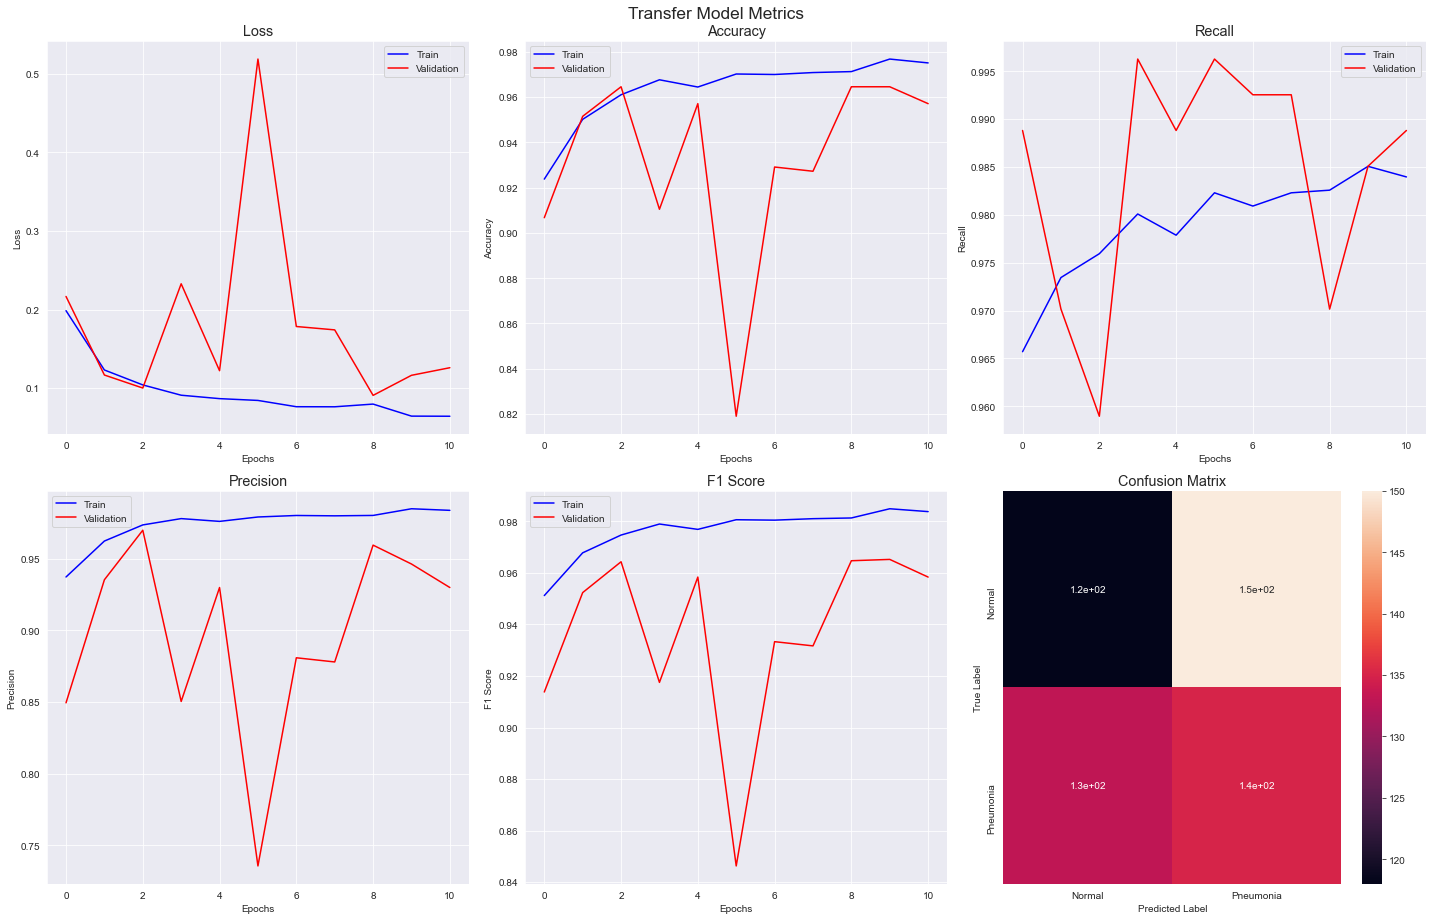

In [62]:
train_metrics, val_metrics, cnfs_mtrx = create_metric_lists(transfer_model_history,
                                                            transfer_model,
                                                            val_generator,
                                                            val_labels_reshaped)
all_model_metrics = record_all(all_model_metrics, 
                               val_metrics, 
                               'Transfer', 
                               execution_time, 
                               cnfs_mtrx,
                               callback.stopped_epoch)

visualize_metrics(range(callback.stopped_epoch+1), train_metrics, val_metrics, 'Transfer Model', cnfs_mtrx)

In [63]:
import pandas as pd
df = pd.DataFrame.from_dict(all_model_metrics, orient='columns')
df.set_index('Model', inplace=True)

In [64]:
df

,Loss,Accuracy,Recall,Precision,F1 Score,Computation Time per Epoch,Confusion Matrix
Model,,,,,,,
Baseline Model,0.394095,0.941176,0.983607,0.895522,0.937500,1,"[[68, 7], [1, 60]]"
Baseline 75,0.694550,0.495098,1.000000,0.495098,0.662295,3,"[[0, 206], [0, 202]]"
CNN,0.273875,0.962687,1.000000,0.930556,0.964029,176,"[[121, 147], [127, 141]]"
CNN with Reg,0.094840,0.973881,0.988806,0.960145,0.974265,115,"[[132, 136], [128, 140]]"
Transfer,0.125952,0.957090,0.988806,0.929825,0.958409,316,"[[118, 150], [133, 135]]"


In [65]:
df['Confusion Matrix']

Model
Baseline Model          [[68, 7], [1, 60]]
Baseline 75           [[0, 206], [0, 202]]
CNN               [[121, 147], [127, 141]]
CNN with Reg      [[132, 136], [128, 140]]
Transfer          [[118, 150], [133, 135]]
Name: Confusion Matrix, dtype: object

In [66]:
test_img_reshaped = test_images[0].reshape(test_images[0].shape[0],-1)
test_labels_reshaped = test_labels[0].reshape(test_labels[0].shape[0],1)

for i in range(1,78):
    test_img_reshaped = np.concatenate((test_img_reshaped, test_images[i].reshape(test_images[i].shape[0], -1)))
    test_labels_reshaped = np.concatenate((test_labels_reshaped, test_labels[i].reshape(test_labels[i].shape[0], -1)))
len(test_labels_reshaped)

624

In [69]:
cnn_reg.evaluate(test_generator)

78/78 [==============================] - 6s 75ms/step - loss: 0.9576 - accuracy: 0.7885 - recall_3: 0.9923 - precision_3: 0.7500


[0.9575909376144409, 0.7884615659713745, 0.9923076629638672, 0.75]

In comparing all of our models, we can see that the top three performers are the CNN model, the CNN with Regularization, and the Transfer Learning model.  All three have accuracy, recall, precision, and F1 scores all above 90%.  With an overall accuracy of 97.34%, and an F1 score of 97.40% this model is the most consistent across metrics, which is clearly shown in the Confusion Matrix.  The goal of this project is to capture as many people with pneumonia as possible, but the idea is to untilize this model in areas with limited access and resoursess.  That is why it is important to consider precision just as much as recall, and why we also want a lighter, quicker model if possible.  

- intro --> distribution of pixel values?
- Choose Final Model (with explanation)
- Evaluate Final Model with Test Group
- Visuals --> tenserboard? 
    - explain model structure
    - What is most important to model -- how is it making its predictions? how can we use that information for a recommendation
    - Activaton layers (LIME library) --> show stakeholders ways to interpret model to gain insight --> which pixels most important --> further research into that area of lungs?
    - Final Recommendation?
    - Research False Negatives --> why? any commonalities between images? where is model weak?
    
- Seperate document for google colab (want to include?)
- clean up markdown sections
- 

# Final Model Evaluation

- choose final model + give reasonings as to why
- evaluate final model with holdout test data

- Visualize model structure!! Connect to Recommendations.

In [ ]:
#final_model_results = final_model.evaluate(test_generator)
#print(results)

In [75]:
# Model's architecture
#from tensorflow.keras.utils import plot_model
#plot_model(cnn, show_shapes=True, show_layer_names=True)

In [ ]:
# FROM MORGAN'S

# Extract Layer Names for Labelling
#layer_names = []
#for layer in reg_model.layers[:8]:
#    layer_names.append(layer.name)

#total_features = sum([a.shape[-1] for a in activations])
#total_features

#n_cols = 16
#n_rows = math.ceil(total_features / n_cols)


#iteration = 0
#fig , axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols, n_rows*1.5))

#for layer_n, layer_activation in enumerate(activations):
#    n_channels = layer_activation.shape[-1]
#    for ch_idx in range(n_channels):
#        row = iteration // n_cols
#        column = iteration % n_cols
    
#        ax = axes[row, column]

#        channel_image = layer_activation[0,
#                                         :, :,
#                                         ch_idx]
        # Post-process the feature to make it visually palatable
#        channel_image -= channel_image.mean()
#        channel_image /= channel_image.std()
#        channel_image *= 64
#        channel_image += 128
#        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
               
#        ax.imshow(channel_image, aspect='auto', cmap='viridis')
#        ax.get_xaxis().set_ticks([])
#        ax.get_yaxis().set_ticks([])
        
#        if ch_idx == 0:
#            ax.set_title(layer_names[layer_n], fontsize=10)
#        iteration += 1

#fig.subplots_adjust(hspace=1.25)
#plt.savefig('Intermediate_Activations_Visualized.pdf')
#plt.show()

## Recommendations